In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#read the csv
dataset=pd.read_csv('brich.csv')
dataset

,ID,X,Y,Z,Category
0,1,1.5,1.7,1.3,B
1,2,2.0,2.4,2.6,C
2,3,2.5,3.1,3.9,A
3,4,3.0,3.8,5.2,B
4,5,3.5,1.0,6.5,C
...,...,...,...,...,...
95,96,8.0,4.7,6.5,A
96,97,8.5,5.4,7.8,B
97,98,9.0,6.1,0.0,C
98,99,9.5,6.8,1.3,A


In [10]:
# Extract numerical features for normalization and clustering
numerical_data = dataset[['X', 'Y', 'Z']].values
numerical_data

array([[1.5, 1.7, 1.3],
       [2. , 2.4, 2.6],
       [2.5, 3.1, 3.9],
       [3. , 3.8, 5.2],
       [3.5, 1. , 6.5],
       [4. , 1.7, 7.8],
       [4.5, 2.4, 0. ],
       [5. , 3.1, 1.3],
       [5.5, 3.8, 2.6],
       [1. , 1. , 3.9],
       [1.5, 1.7, 5.2],
       [2. , 2.4, 6.5],
       [2.5, 3.1, 7.8],
       [3. , 3.8, 0. ],
       [3.5, 1. , 1.3],
       [4. , 1.7, 2.6],
       [4.5, 2.4, 3.9],
       [5. , 3.1, 5.2],
       [5.5, 3.8, 6.5],
       [2. , 1. , 7.8],
       [2.5, 1.7, 0. ],
       [3. , 2.4, 1.3],
       [3.5, 3.1, 2.6],
       [4. , 3.8, 3.9],
       [4.5, 2. , 5.2],
       [5. , 2.7, 6.5],
       [5.5, 3.4, 7.8],
       [6. , 4.1, 0. ],
       [6.5, 4.8, 1.3],
       [2. , 2. , 2.6],
       [2.5, 2.7, 3.9],
       [3. , 3.4, 5.2],
       [3.5, 4.1, 6.5],
       [4. , 4.8, 7.8],
       [4.5, 2. , 0. ],
       [5. , 2.7, 1.3],
       [5.5, 3.4, 2.6],
       [6. , 4.1, 3.9],
       [6.5, 4.8, 5.2],
       [3. , 2. , 6.5],
       [3.5, 2.7, 7.8],
       [4. , 3.4

In [12]:
from sklearn.preprocessing import StandardScaler
# Normalize the data using MinMaxScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)
normalized_data

array([[-1.9279159 , -1.52539865, -0.98882675],
       [-1.67424276, -1.04871157, -0.48688424],
       [-1.42056961, -0.57202449,  0.01505828],
       [-1.16689647, -0.09533742,  0.51700079],
       [-0.91322332, -2.00208572,  1.0189433 ],
       [-0.65955018, -1.52539865,  1.52088581],
       [-0.40587703, -1.04871157, -1.49076926],
       [-0.15220389, -0.57202449, -0.98882675],
       [ 0.10146926, -0.09533742, -0.48688424],
       [-2.18158904, -2.00208572,  0.01505828],
       [-1.9279159 , -1.52539865,  0.51700079],
       [-1.67424276, -1.04871157,  1.0189433 ],
       [-1.42056961, -0.57202449,  1.52088581],
       [-1.16689647, -0.09533742, -1.49076926],
       [-0.91322332, -2.00208572, -0.98882675],
       [-0.65955018, -1.52539865, -0.48688424],
       [-0.40587703, -1.04871157,  0.01505828],
       [-0.15220389, -0.57202449,  0.51700079],
       [ 0.10146926, -0.09533742,  1.0189433 ],
       [-1.67424276, -2.00208572,  1.52088581],
       [-1.42056961, -1.52539865, -1.490

In [14]:
from sklearn.cluster import Birch
# Apply the BIRCH clustering algorithm
birch_model = Birch(threshold=0.2, n_clusters=None)
birch_model.fit(normalized_data)

Birch(n_clusters=None, threshold=0.2)

In [17]:
# Assign cluster labels to the data
dataset['Cluster'] = birch_model.labels_
dataset['Cluster']

0      0
1      1
2      2
3      3
4      4
      ..
95    63
96    64
97    80
98    81
99    55
Name: Cluster, Length: 100, dtype: int32

In [ ]:
# Check the number of clusters formed

u=np.unique(birch_model.labels_)
print(u)
n_cluster=len(u)
print(f"The Number of clusters formed :{n_cluster}");


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81]


In [22]:

from mpl_toolkits.mplot3d import Axes3D


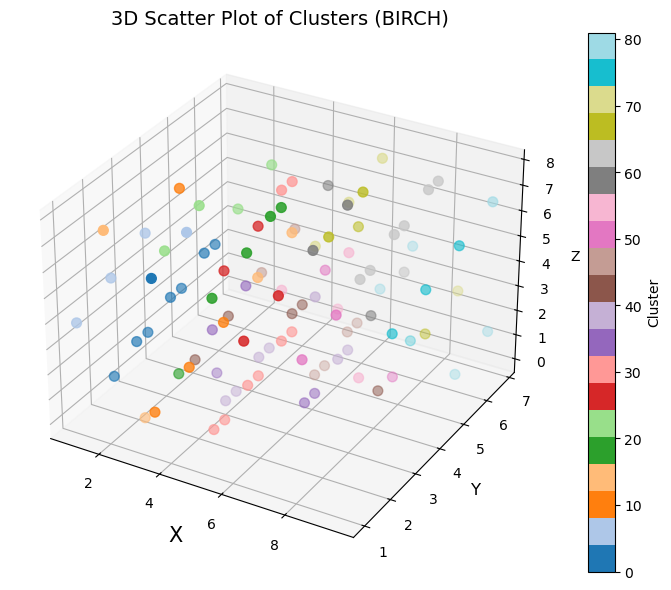

In [25]:
# Prepare 3D scatter plot for visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters color-coded
scatter = ax.scatter(
    dataset['X'], dataset['Y'], dataset['Z'],
    c=dataset['Cluster'], cmap='tab20', s=50
)

# Add labels and legend
ax.set_title("3D Scatter Plot of Clusters (BIRCH)", fontsize=14)
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("Z", fontsize=10)
plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()